 # МЕТОДЫ ПРОГРАММИРОВАНИЯ. Лабораторная №3

1) Придумать «простую» и «сложную» (более эффективную по скорости и с меньшим числом коллизий) хэш-функции вычисления хэша ключевого поля своего класса.

2) Добавить поле со значением хэша в класс, изменить конструкторы и методы соответствующим образом.

3) Построить хэш таблицу на основе значения хэша и написать функцию поиска элемента в массиве объектов с использованием хэш-таблицы, реализовать один из методов разрешения коллизий.

4) Провести эксперименты с исследованием зависимости времени поиска от размерности массива для обоих хэш-функций, построить графики.

5) Сравнить результаты с результатами времени поиска, полученными в предыдущей работе.

6) Исследовать зависимость числа коллизий для каждой хэш-функции от размерности массива, построить график.

In [5]:
import pandas as pd

## Пункт 1

In [108]:
def hash1(string : str) -> int: 
    ans = 1
    for i in string:
        ans *= (ord(i) - 23)
    return ans 

def hash2(string : str) -> int: 
    ans = 0
    for i in string:
        ans = 324 * ans + ord(i) - 19
    return ans


## Пункт 2

In [109]:
class Table:
    def __init__(self, raw: pd.core.series.Series):
        self.name = raw[0]
        self.status = raw[1]
        self.number = raw[2]
        self.age = raw[3]
        self.hash1 = hash1(self.status)
        self.hash2 = hash2(self.status)
        
    def __eq__(self, other): #x = y
        if self.name == other.name:
            if self.status == other.status:
                if self.number == other.number:
                    if self.age == other.age:
                        return True
        return False
    
    def __ne__(self, other): #x != y
        if self == other:
            return False
        else:
            return True
        
    def __lt__(self, other): #x < y
        if self.status < other.status:
            return True
        elif self.status == other.status:
            if self.name < other.name:
                return True
            elif self.name == other.name:
                if self.number < other.number:
                    return True
        return False
    
    def __gt__(self, other): #x > y
        if self.status > other.status:
            return True
        elif self.status == other.status:
            if self.name > other.name:
                return True
            elif self.name == other.name:
                if self.number > other.number:
                    return True
        return False
    
    def __le__(self, other): #x <= y
        if (self < other) or (self == other):
            return True
        else:
            return False
        
    def __ge__(self, other): #x >= y
        if (self > other) or (self == other):
            return True
        else:
            return False

## Пункт 3

### Сначала считаем таблицы и сделаем из них списки

In [110]:
ns = [100, 500, 1000, 5000, 10000, 50000, 100000, 200000]

In [111]:
def read_table(n):
    tables = []
    for i in n:
        table_name = '/Users/sofia/Desktop/учеба/3 курс/методы проги/лаба3/table' + str(i) + '.csv'
        table_from = pd.read_csv(table_name)
        tables.append(table_from)
    return tables

In [112]:
tables = read_table(ns)   

### Переделываем таблицы в классы

In [113]:
def table_to_class(pds):
    objects = []
    for pd in pds:
        x = []
        for i in range(len(pd)):
            ob = Table(pd.iloc[i])
            x.append(ob)
        objects.append(x)
    return objects

In [114]:
arrs = table_to_class(tables)

In [139]:
# arrs[0][0].hash1 - так можно обращаться

In [115]:
# проверка:
print(arrs[0][0].status)
print(arrs[0][0].hash1)
print(arrs[0][0].hash2)

print()
print(hash1('yigsibqbhu'))
print(hash2('yigsibqbhu'))

yigsibqbhu
18694312727328000000
4023809019041177413909862

18694312727328000000
4023809019041177413909862


## Теперь хэш-таблицы:
Построить хэш таблицу на основе значения хэша и написать функцию поиска элемента в массиве объектов с использованием хэш-таблицы, реализовать один из методов разрешения коллизий. </br>


In [116]:
def hash_table1(arr):
    collision = 0
    hash_table = {}
    for element in arr:
        hashes = hash_table.keys() 
        if element.hash1 in hashes:
            collision += 1
            hash_table[element.hash1].append(element)
        else:
            new_list = [element]
            hash_table[element.hash1] = new_list
    return hash_table, collision   
            

In [117]:
def hash_table2(arr):
    collision = 0
    hash_table = {}
    for element in arr:
        hashes = hash_table.keys() 
        if element.hash2 in hashes:
            collision += 1
            hash_table[element.hash2].append(element)
        else:
            new_list = [element]
            hash_table[element.hash2] = new_list
    return hash_table, collision 

In [118]:
def findWithHashTable1(hash_table, key : str):
    hash_key = hash1(key)
    
    hashes = hash_table.keys()
    if hash_key in hashes:
        for i in range(len(hash_table[hash_key])):
            if hash_table[hash_key][i].status == key:
                return hash_table[hash_key][i]   

In [119]:
def findWithHashTable2(hash_table, key : str):
    hash_key = hash2(key)
    
    hashes = hash_table.keys()
    if hash_key in hashes:
        for i in range(len(hash_table[hash_key])):
            if hash_table[hash_key][i].status == key:
                return hash_table[hash_key][i]  

## Пункт 4
4) Провести эксперименты с исследованием зависимости времени поиска от размерности массива для обоих хэш-функций, построить графики.



### Для начала надо создать хэш-таблицы:

In [120]:
hash_tables1 = [] # list[dict]
hash_tables2 = [] # list[dict]
collisions1 = [] # list[int]
collisions2 = [] # list[int]
for arr in arrs:
    table1, collision1 = hash_table1(arr)
    collisions1.append(collision1)
    hash_tables1.append(table1)
    
    table2, collision2 = hash_table2(arr)
    collisions2.append(collision2)
    hash_tables2.append(table2)
    
    

In [121]:
import random

In [122]:
keys = []

for i in range(len(arrs)):
    key_number = random.randint(0, len(arrs[i]))
    keys.append(arrs[i][key_number].status)
    
keys

['uknjssqsaltkf',
 'cpbwcfvsbyp',
 'lxallfzhj',
 'kiqoffdkhraecex',
 'psvfvhoai',
 'uiowoxgzjxa',
 'ffpxxsebb',
 'pyjdciqugi']

In [123]:
from time import time

In [124]:
time_hash1 = []
time_hash2 = []

for i in range(len(arrs)):
    start_time = time()
    findWithHashTable1(hash_tables1[i], keys[i])
    result_time = time() - start_time
    time_hash1.append(result_time)
    
    start_time = time()
    findWithHashTable2(hash_tables2[i], keys[i])
    result_time = time() - start_time
    time_hash2.append(result_time)

### Строим график

In [125]:
import matplotlib.pyplot as plt

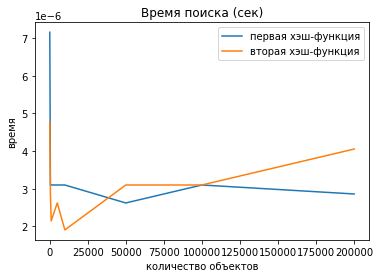

In [135]:
# x - размер - который меняется
# y - время - которое мяняется
y = ns

plt.plot(y, time_hash1, label = 'первая хэш-функция')
plt.plot( y, time_hash2,label = 'вторая хэш-функция')
plt.title('Время поиска (сек)')
plt.xlabel("количество объектов")
plt.ylabel("время")
plt.legend()
plt.show()

## Пункт 5
Сравнить результаты с результатами времени поиска, полученными в предыдущей работе.

In [128]:
# прямой поиск
def line_search(lst_f, size, key):
    for i in lst_f:
        if i.status == key:
            return
        
# бинарный поиск
def bin_search(lst_f, start, end, key):
    mid = 0
    while (1):
        mid = (start + end) // 2
        if key < lst_f[mid].status:
            end = mid - 1
        elif key > lst_f[mid].status:
            start = mid + 1
        else:
            return

# ассоциативный массив
from collections import defaultdict

def make_dict(lst_f):
    mas_dict = defaultdict(list)
    for i in lst_f:
        mas_dict[i.status].append(i)
    return mas_dict

# пирамидальная сортировка
import sys
sys.setrecursionlimit(1000000)

def change_pose(x, i, n): # сравнимает iый элемент с его дочерними 
    # n - первые n элементов, которые нужны учитывать
    i_left = 2 * i + 1 # левый дочерний узел
    i_right = 2* i + 2 # правый дочерний узел
    i_maxi = i
    if i_left <= n and x[i_left] > x[i_maxi]: # !! <=n - входит в нужный нам диапазон
        i_maxi = i_left
    if i_right <= n and x[i_right] > x[i_maxi]: # !! <=n - входит в первые n  элементов списка
        i_maxi = i_right
        
    if i_maxi == i: # поменялось ли значение
        return
    else:
        x[i_maxi], x[i] = x[i], x[i_maxi] # меняем с одним из дочерних (макс) узлов
        change_pose(x, i_maxi, n) # продолжаем процедуру для нового положения узла - для ноого списка
        
def make_tree(x):
    middle = len(x) // 2
    for i in reversed(range(0, middle+1)):
        change_pose(x, i, len(x)-1)

def pyramid_sort(arr):
    x = arr.copy()
    start = time()
    make_tree(x) # строим пирамиду / дерево
    for i in reversed(range(0, len(x))): # идем с конца в начало
        x[0], x[i] = x[i], x[0]
        change_pose(x, 0, i-1)
    end = time()
    period = end - start
    return x, period

In [129]:
line_search_time = []
binary_search_time = []
binary_and_sort_time = []
dict_time = []

for i in range(len(arrs)):
    time_start = time()
    line_search(arrs[i], len(arrs[i]), keys[i])
    time_end = time() - time_start
    line_search_time.append(time_end)
    
    time_start = time()
    sorted_array = pyramid_sort(arrs[i])
    bin_search(sorted_array[0], 0, len(arrs[i]), keys[i])
    time_end = time() - time_start
    binary_and_sort_time.append(time_end)
    
    time_start = time()
    bin_search(sorted_array[0], 0, len(arrs[i]), keys[i])
    time_end = time() - time_start
    binary_search_time.append(time_end)
    
    multimap = make_dict(arrs[i])
    time_start = time()
    multimap[keys[i]]
    time_end = time() - time_start
    dict_time.append(time_end)

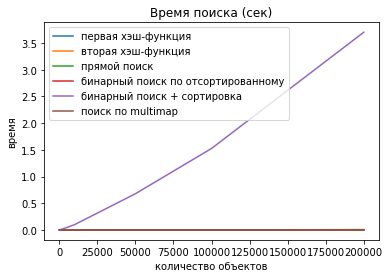

In [140]:
y = ns


plt.plot(y, time_hash1, label = 'первая хэш-функция')
plt.plot( y, time_hash2,label = 'вторая хэш-функция')
plt.plot( y,line_search_time, label = 'прямой поиск')
plt.plot( y,binary_search_time, label = 'бинарный поиск по отсортированному')
plt.plot( y, binary_and_sort_time,label = 'бинарный поиск + сортировка')
plt.plot(y,dict_time,  label = 'поиск по multimap')
plt.title('Время поиска (сек)')
plt.xlabel("количество объектов")
plt.ylabel("время")
plt.legend()
plt.show()

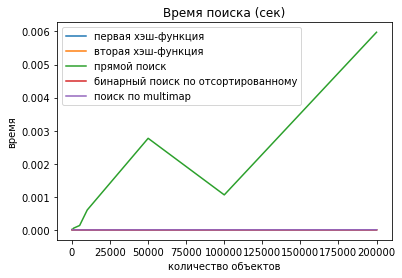

In [141]:
plt.plot(y, time_hash1, label = 'первая хэш-функция')
plt.plot( y, time_hash2,label = 'вторая хэш-функция')
plt.plot( y,line_search_time, label = 'прямой поиск')
plt.plot( y,binary_search_time, label = 'бинарный поиск по отсортированному')
# plt.plot( y, binary_and_sort_time,label = 'бинарный поиск + сортировка')
plt.plot(y,dict_time,  label = 'поиск по multimap')
plt.title('Время поиска (сек)')
plt.xlabel("количество объектов")
plt.ylabel("время")
plt.legend()
plt.show()

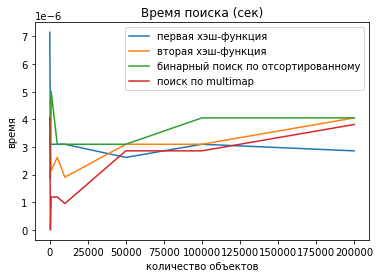

In [142]:
plt.plot(y, time_hash1, label = 'первая хэш-функция')
plt.plot( y, time_hash2,label = 'вторая хэш-функция')
# plt.plot( y,line_search_time, label = 'прямой поиск')
plt.plot( y,binary_search_time, label = 'бинарный поиск по отсортированному')
# plt.plot( y, binary_and_sort_time,label = 'бинарный поиск + сортировка')
plt.plot(y,dict_time,  label = 'поиск по multimap')
plt.title('Время поиска (сек)')
plt.xlabel("количество объектов")
plt.ylabel("время")
plt.legend()
plt.show()

## Пункт 6
Исследовать зависимость числа коллизий для каждой хэш-функции от размерности массива, построить график.

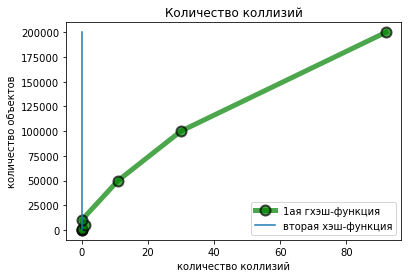

In [133]:
y = ns

# plt.plot(collisions1, y, label = 'первая хэш-функция')
# plt.plot(collisions2, y, label = 'вторая хэш-функция')
plt.plot(collisions1, y, 'o-g', alpha=0.7, label="1ая гхэш-функция", lw=5, mec='black', mew=2, ms=10)
plt.plot(collisions2, y, label = 'вторая хэш-функция')
plt.title('Количество коллизий')
plt.ylabel("количество объектов")
plt.xlabel("количество коллизий")
plt.legend()
plt.show()